In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

5


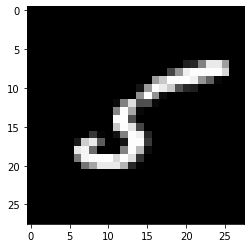

In [76]:
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True)
image, label = train_dataset[11]
print(label)
plt.imshow(image, cmap="gray")

In [90]:
batch_size = 64
learning_rate = 0.001
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [91]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-

In [97]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1014, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1, 1014)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [93]:
N = 64
data = torch.rand(N,1,28,28)
print(data.shape)
conv1 = nn.Conv2d(1, 12, kernel_size=1)
conv2 = nn.Conv2d(12, 6, kernel_size=3)
max_pool = nn.MaxPool2d(2, 2)
x = conv1(data)
print(x.shape)
x = conv2(x)
print(x.shape)
x = max_pool(x)
print(x.shape)
x = x.view(-1,1014)
fc1 = nn.Linear(1014, 256)
x = fc1(x)
print(x.shape)
fc2 = nn.Linear(256, 128)
x = fc2(x)
print(x.shape)
fc3 = nn.Linear(128,10)
x = fc3(x)
print(x.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 12, 28, 28])
torch.Size([64, 6, 26, 26])
torch.Size([64, 6, 13, 13])
torch.Size([64, 256])
torch.Size([64, 128])
torch.Size([64, 10])


In [94]:
model = CNN().to(device=device)
out = model(train_features)
print(f'Output shape of one MNIST image {out.shape}')

Output shape of one MNIST image torch.Size([64, 10])


In [98]:
epochs = 100
model = CNN().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')



Epoch [1/100], Step [100/938], Loss: 0.4318 
Epoch [1/100], Step [200/938], Loss: 0.0852 
Epoch [1/100], Step [300/938], Loss: 0.2245 
Epoch [1/100], Step [400/938], Loss: 0.0648 
Epoch [1/100], Step [500/938], Loss: 0.0839 
Epoch [1/100], Step [600/938], Loss: 0.1503 
Epoch [1/100], Step [700/938], Loss: 0.0694 
Epoch [1/100], Step [800/938], Loss: 0.0759 
Epoch [1/100], Step [900/938], Loss: 0.2175 
Epoch [2/100], Step [100/938], Loss: 0.0844 
Epoch [2/100], Step [200/938], Loss: 0.0885 
Epoch [2/100], Step [300/938], Loss: 0.1121 
Epoch [2/100], Step [400/938], Loss: 0.0771 
Epoch [2/100], Step [500/938], Loss: 0.0267 
Epoch [2/100], Step [600/938], Loss: 0.0899 
Epoch [2/100], Step [700/938], Loss: 0.1002 
Epoch [2/100], Step [800/938], Loss: 0.0640 
Epoch [2/100], Step [900/938], Loss: 0.0185 


KeyboardInterrupt: 